In [1]:
#import Libraries 
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#import data
chd_data=pd.read_csv('/content/CHDdata diagnosis.csv')
chd_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [4]:
#check for null value 
chd_data.isnull().sum()


sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [5]:
#check for duplicated
chd_data.duplicated().sum()

0

In [6]:
#check data types
chd_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(chd_data.iloc[:,4])
chd_data.iloc[:,4]=le.transform(chd_data.iloc[:,4])
chd_data


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


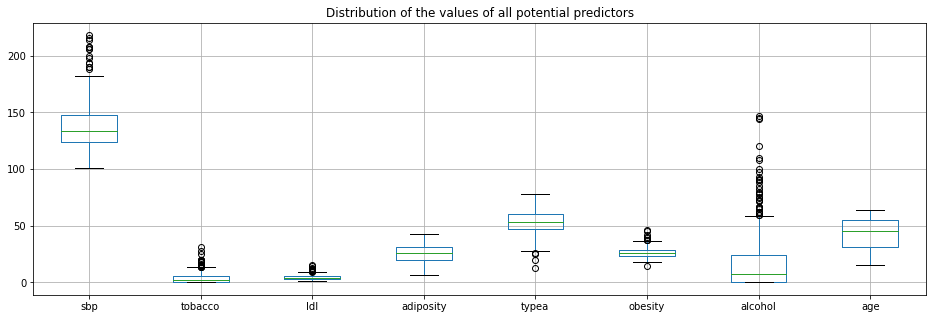

In [8]:
Index = np.r_[0:4,5:9]
plt.figure(figsize=(16,5))
chd_data.iloc[:,Index].boxplot()
plt.title("Distribution of the values ​​of all potential predictors")
plt.show()


In [9]:
outliers = ['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol']
for column in outliers:
  Q1,Q3 = np.percentile(chd_data[column],[25,75])
  IQR = Q3 - Q1
  lower_fence = Q1 - (1.5*IQR)
  upper_fence = Q3 + (1.5*IQR)  
  chd_data[column] = chd_data[column].apply(lambda x: upper_fence if x>upper_fence
                                              else lower_fence if x<lower_fence else x)      

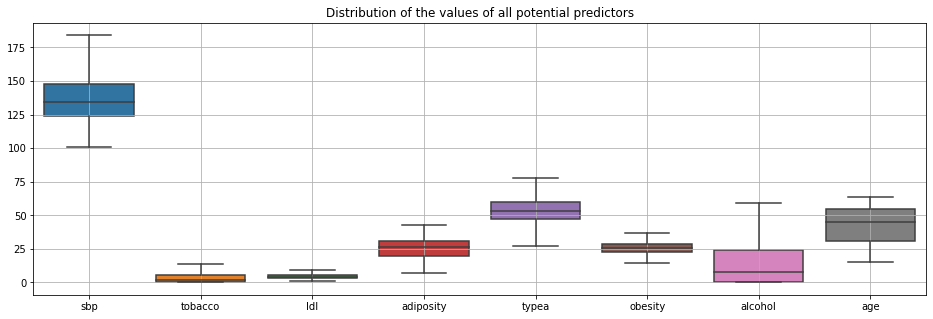

In [10]:
plt.figure(figsize=(16,5))
sns.boxplot(data=chd_data.iloc[:,Index])
plt.title("Distribution of the values ​​of all potential predictors")
plt.grid()
plt.show()

In [11]:
chd_data.to_csv('diagnosis_clean.csv', index=False)

In [12]:
df_clean = pd.read_csv('diagnosis_clean.csv')
df_clean.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,1,49.0,25.30,58.96625,52,1
1,144.0,0.01,4.41,28.61,0,55.0,28.87,2.06000,63,1
2,118.0,0.08,3.48,32.28,1,52.0,29.14,3.81000,46,0
3,170.0,7.50,6.41,38.03,1,51.0,31.99,24.26000,58,1
4,134.0,13.60,3.50,27.78,1,60.0,25.99,57.34000,49,1


In [13]:
#rescaling
scaler = StandardScaler()
chd_data.iloc[:,Index] = scaler.fit_transform(chd_data.iloc[:,Index])
chd_data.iloc[0:5,:]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.191055,2.192213,0.557379,-0.295503,1,-0.432099,-0.170222,2.376877,0.629336,1
1,0.335523,-0.878642,-0.144857,0.412140,0,0.191095,0.728577,-0.708434,1.383115,1
2,-1.054716,-0.860714,-0.639614,0.884332,1,-0.120502,0.796553,-0.613553,0.218184,0
3,1.725763,1.039682,0.919137,1.624141,1,-0.224368,1.514082,0.495193,1.040488,1
4,-0.199184,2.602001,-0.628974,0.305351,1,0.710422,0.003495,2.288706,0.423760,1


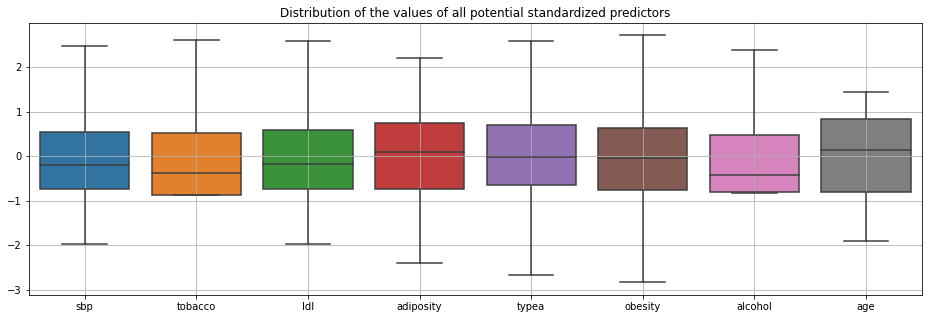

In [14]:
plt.figure(figsize=(16,5))
sns.boxplot(data=chd_data.iloc[:,Index])
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

In [ ]:
#spliting data
x=chd_data.iloc[:,:-1]
y=chd_data.iloc[:,-1]
x

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,1,-0.418470,-0.176786,1.714276,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,0,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,1,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,1,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,1,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...,...
457,2.230775,-0.705234,0.599263,0.812281,0,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,0,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,0,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,2.325616,0.692625,0,1.111065,0.310252,0.283203,-0.192969


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

In [ ]:
x_train.iloc[0,:]

sbp          0.325931
tobacco      1.190996
ldl          0.241545
adiposity    0.275758
famhist      0.000000
typea        0.601220
obesity     -1.207881
alcohol      0.186289
age          1.246064
Name: 27, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
classifiers = []
classifiers.append(("LR",LogisticRegression(random_state=0)))
classifiers.append(("NB",GaussianNB()))
classifiers.append(("DT",DecisionTreeClassifier(random_state = 0)))
classifiers.append(("RF",RandomForestClassifier(random_state = 0)))
classifiers.append(("SVM",SVC()))
classifiers.append(("KNN", KNeighborsClassifier()))
scores = []
clf_names = []

In [ ]:
my_list = [ 0.2, 0.25, 0.33, 0.4]
for clf in classifiers:
  score = 0
  recall = 0
  for p in my_list:
    for i in range(101):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = p, random_state = i)
      classifier = clf[1]
      classifier.fit(X_train,y_train)
      y_pred = classifier.predict(X_test)
      acc_score = (accuracy_score(y_test,y_pred)*100).round(2)
      rec_score = recall_score(y_test,y_pred)
      if acc_score > score:
          score = acc_score
          recall = rec_score
          paramters = (p, i, score, recall)
  p, i, score, recall = paramters
  print("classifier = {}, P = {}, i = {}, score = {}, recall = {}".format(classifier, p,i,score, recall))

classifier = LogisticRegression(random_state=0), P = 0.2, i = 67, score = 81.72, recall = 0.7083333333333334
classifier = GaussianNB(), P = 0.2, i = 33, score = 79.57, recall = 0.7894736842105263
classifier = DecisionTreeClassifier(random_state=0), P = 0.2, i = 0, score = 74.19, recall = 0.625
classifier = RandomForestClassifier(random_state=0), P = 0.2, i = 69, score = 78.49, recall = 0.6176470588235294
classifier = SVC(), P = 0.2, i = 62, score = 81.72, recall = 0.6296296296296297
classifier = KNeighborsClassifier(), P = 0.2, i = 80, score = 75.27, recall = 0.4642857142857143


In [ ]:
my_list = [ 0.2, 0.25, 0.33, 0.4]
for clf in classifiers:
  score = 0
  recall = 0
  for p in my_list:
    for i in range(101):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = p, random_state = i)
      classifier = clf[1]
      classifier.fit(X_train,y_train)
      y_pred = classifier.predict(X_test)
      acc_score = (accuracy_score(y_test,y_pred)*100).round(2)
      rec_score = recall_score(y_test,y_pred)
      if rec_score > recall:
          score = acc_score
          recall = rec_score
          paramters = (p, i, score, recall)
  p, i, score, recall = paramters
  print("classifier = {}, P = {}, i = {}, score = {}, recall = {}".format(classifier, p,i,score, recall))

classifier = LogisticRegression(random_state=0), P = 0.25, i = 67, score = 79.31, recall = 0.7241379310344828
classifier = GaussianNB(), P = 0.2, i = 62, score = 78.49, recall = 0.8888888888888888
classifier = DecisionTreeClassifier(random_state=0), P = 0.2, i = 43, score = 72.04, recall = 0.7575757575757576
classifier = RandomForestClassifier(random_state=0), P = 0.25, i = 25, score = 73.28, recall = 0.6785714285714286
classifier = SVC(), P = 0.2, i = 54, score = 79.57, recall = 0.7142857142857143
classifier = KNeighborsClassifier(), P = 0.25, i = 78, score = 66.38, recall = 0.6285714285714286


In [ ]:
# Applying GridSearch on the dataset to Check the best paramters for our Classification
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
for classifier_name, classifier in classifiers:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    if classifier_name == "LR" : 
        parameters = [{'solver' : ['newton-cg', 'lbfgs'], 'penalty' : ['l2'], 
                       'C':[100, 10, 1, 0.1, 0.01],'multi_class':['auto', 'ovr', 'multinomial']},
                      {'solver': ['liblinear'],'penalty' : ['l1', 'l2'],
                       'C':[100, 10, 1, 0.1, 0.01],'multi_class':['auto', 'ovr'],'random_state':[0,1,42]}]
    elif classifier_name == "NB" : 
        continue           
    elif classifier_name == "DT" :
        parameters = [{'criterion' : ['gini', 'entropy'],'random_state':[ 0, 1, 12, 42],
                        'splitter':['best', 'random'], 'max_features': ['sqrt', 'log2']}]
    elif classifier_name == "RF" :
        parameters = [{'bootstrap':[True], 'criterion' : ['gini', 'entropy'], 'n_estimators':[10,15,20,25],
                        'max_depth':[110,130,150,170], 'random_state':[ 0, 1 , 42],
                       'min_samples_leaf':[7,9,11,13],'min_samples_split':[8,12,14],'max_features': ['sqrt', 'log2']}]
    elif classifier_name == "SVM" :
        parameters = [{'C':[100, 10, 1, 0.1, 0.01], 'gamma' : ['auto', 'scale'],
                       'kernel': ['poly', 'rbf', 'sigmoid']},
                      {'C':[100, 10, 1, 0.1, 0.01], 'kernel': ['linear']}]    
    elif classifier_name == "KNN" :
        parameters = [{'n_neighbors': range(1, 21, 2),
                       'weights' : ['uniform', 'distance'],'n_jobs': [-1],
                       'algorithm' : ['auto', 'ball_tree', 'kd_tree','brute']}]
    grid_search= GridSearchCV(estimator = classifier,
                              param_grid = parameters,
                              scoring = 'accuracy',
                              cv = cv, n_jobs = -1)
    grid_search = grid_search.fit(x, y)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print(classifier_name," (best score) : ", best_accuracy)
    print("best parameters : ", best_parameters)
   

LR  (best score) :  0.7294374318217237
best parameters :  {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
DT  (best score) :  0.6495247000155836
best parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'random_state': 1, 'splitter': 'best'}
RF  (best score) :  0.7158017765310892
best parameters :  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 110, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 8, 'n_estimators': 25, 'random_state': 42}
SVM  (best score) :  0.7251908991740688
best parameters :  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
KNN  (best score) :  0.6904784167056258
best parameters :  {'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 13, 'weights': 'distance'}


In [ ]:
classifiers = []
classifiers.append(("LR",LogisticRegression(C = 0.1, multi_class =  'auto', penalty = 'l2', solver =  'newton-cg')))
classifiers.append(("NB",GaussianNB()))
classifiers.append(("DT",DecisionTreeClassifier(criterion = 'entropy', max_features ='sqrt', random_state = 1, splitter = 'best')))
classifiers.append(("RF",RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_depth = 110, max_features = 'sqrt', 
                                                min_samples_leaf = 11, min_samples_split = 8, n_estimators = 25, random_state = 42)))
classifiers.append(("SVM",SVC(C = 1, gamma = 'auto', kernel = 'rbf')))
classifiers.append(("KNN", KNeighborsClassifier(algorithm = 'auto', n_jobs = -1, n_neighbors = 13, weights = 'distance')))

In [ ]:
my_list = [ 0.2, 0.25, 0.33, 0.4]
for clf in classifiers:
  score = 0
  recall = 0
  for p in my_list:
    for i in range(101):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = p, random_state = i)
      classifier = clf[1]
      classifier.fit(X_train,y_train)
      y_pred = classifier.predict(X_test)
      acc_score = (accuracy_score(y_test,y_pred)*100).round(2)
      rec_score = recall_score(y_test,y_pred)
      if acc_score > score:
          score = acc_score
          recall = rec_score
          paramters = (p, i, score, recall)
  p, i, score, recall = paramters
  print("classifier = {}, P = {}, i = {}, score = {}, recall = {}".format(classifier, p, i, score, recall))

classifier = LogisticRegression(C=0.1, solver='newton-cg'), P = 0.25, i = 67, score = 81.9, recall = 0.7241379310344828
classifier = GaussianNB(), P = 0.2, i = 33, score = 79.57, recall = 0.7894736842105263
classifier = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=1), P = 0.2, i = 1, score = 76.34, recall = 0.5925925925925926
classifier = RandomForestClassifier(criterion='entropy', max_depth=110, max_features='sqrt',
                       min_samples_leaf=11, min_samples_split=8,
                       n_estimators=25, random_state=42), P = 0.25, i = 9, score = 81.03, recall = 0.5135135135135135
classifier = SVC(C=1, gamma='auto'), P = 0.2, i = 62, score = 82.8, recall = 0.6666666666666666
classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=13, weights='distance'), P = 0.2, i = 62, score = 83.87, recall = 0.5555555555555556


In [ ]:
my_list = [ 0.2, 0.25, 0.33, 0.4]
for clf in classifiers:
  score = 0
  recall = 0
  for p in my_list:
    for i in range(101):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = p, random_state = i)
      classifier = clf[1]
      classifier.fit(X_train,y_train)
      y_pred = classifier.predict(X_test)
      acc_score = (accuracy_score(y_test,y_pred)*100).round(2)
      rec_score = recall_score(y_test,y_pred)
      if rec_score > recall:
          score = acc_score
          recall = rec_score
          paramters = (p, i, score, recall)
  p, i, score, recall = paramters
  print("classifier = {}, P = {}, i = {}, score = {}, recall = {}".format(classifier, p,i,score, recall))

classifier = LogisticRegression(C=0.1, solver='newton-cg'), P = 0.25, i = 67, score = 81.9, recall = 0.7241379310344828
classifier = GaussianNB(), P = 0.2, i = 62, score = 78.49, recall = 0.8888888888888888
classifier = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=1), P = 0.2, i = 28, score = 70.97, recall = 0.7
classifier = RandomForestClassifier(criterion='entropy', max_depth=110, max_features='sqrt',
                       min_samples_leaf=11, min_samples_split=8,
                       n_estimators=25, random_state=42), P = 0.25, i = 43, score = 68.97, recall = 0.6904761904761905
classifier = SVC(C=1, gamma='auto'), P = 0.2, i = 54, score = 80.65, recall = 0.7142857142857143
classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=13, weights='distance'), P = 0.25, i = 78, score = 72.41, recall = 0.6


## Final Model

### Highest Accuarcy Model

### Logistic Regression Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 67)
X_train.iloc[0,:]

sbp         -1.090491
tobacco      2.187334
ldl         -0.759100
adiposity   -1.340243
famhist      0.000000
typea       -0.622408
obesity     -1.578505
alcohol      1.309188
age          1.109013
Name: 114, dtype: float64

In [ ]:
lr_acc_clf = LogisticRegression(C = 0.1, multi_class =  'auto', penalty = 'l2', solver =  'newton-cg')
lr_acc_clf.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [ ]:
lr_train_score = lr_acc_clf.score(X_train,y_train)
lr_test_score = lr_acc_clf.score(X_test,y_test)
print('Model Train Score: {} '.format(lr_train_score))
print('Model Test Score: {} '.format(lr_test_score))

Model Train Score: 0.7052023121387283 
Model Test Score: 0.8189655172413793 


In [ ]:
y_pred_lr = lr_acc_clf.predict(X_test)
lr_acc_score = (accuracy_score(y_test,y_pred_lr)*100).round(2)
print("Logistic Regression Highest Accuarcy: {} % ".format(lr_acc_score))

Logistic Regression Highest Accuarcy: 81.9 % 


### KNN Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 62)
X_train.iloc[0,:]

sbp         -0.602069
tobacco      1.496137
ldl         -0.121008
adiposity   -1.039172
famhist      0.000000
typea        1.416972
obesity     -1.585632
alcohol     -0.696983
age          0.423760
Name: 86, dtype: float64

In [ ]:
knn_acc_clf = KNeighborsClassifier(algorithm = 'auto', n_jobs = -1, n_neighbors = 13, weights = 'distance')
knn_acc_clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=13, weights='distance')

In [ ]:
knn_train_score = knn_acc_clf.score(X_train,y_train)
knn_test_score = knn_acc_clf.score(X_test,y_test)
print('Model Train Score: {}'.format(knn_train_score))
print('Model Test Score: {}'.format(knn_test_score))

Model Train Score: 1.0
Model Test Score: 0.8387096774193549


In [ ]:
y_pred_knn = knn_acc_clf.predict(X_test)
knn_acc_score = (accuracy_score(y_test,y_pred_knn)*100).round(2)
print("KNN Highest Accuarcy: {} % ".format(knn_acc_score))

KNN Highest Accuarcy: 83.87 % 


### Support Vector Machine

In [ ]:
svc_acc_clf = SVC(C = 1, gamma = 'auto', kernel = 'rbf')
svc_acc_clf.fit(X_train,y_train)

SVC(C=1, gamma='auto')

In [ ]:
svc_train_score = svc_acc_clf.score(X_train,y_train)
svc_test_score = svc_acc_clf.score(X_test,y_test)
print('Model Train Score: {}'.format(svc_train_score))
print('Model Test Score: {}'.format(svc_test_score))

Model Train Score: 0.7886178861788617
Model Test Score: 0.8279569892473119


In [ ]:
y_pred_svc = svc_acc_clf.predict(X_test)
svc_acc_score = (accuracy_score(y_test,y_pred_svc)*100).round(2)
print("SVC Highest Accuarcy: {} % ".format(svc_acc_score))

SVC Highest Accuarcy: 82.8 % 


### Highest Recall Model

In [ ]:
rec_clf = GaussianNB()
rec_clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_rec = rec_clf.predict(X_test)
rec_score = (recall_score(y_test,y_pred_rec)*100).round(2)
print("Highest Recall: {} % ".format(rec_score))

Highest Recall: 88.89 % 


## Save Optmial Model

In [ ]:
import pickle

In [ ]:
filename = 'chd_diagnostic_best_recall_model.sav'
pickle.dump(rec_clf, open(filename, 'wb'))

In [ ]:
filename = 'chd_diagnostic_best_accuarcy_model.sav'
pickle.dump(svc_acc_clf, open(filename, 'wb'))